In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
size=10
def plot_vazao(df):
    valid_vazao = df[df['original'] != -1]['original']
    plt.scatter(valid_vazao.index, valid_vazao, color='#2a2a2a', label='Vazão Original',s=size)

def plot_interp_linear(df):
    df['Vazao_Sintetica'] = np.where(df['Sintético'] == '1', df['interpolacao-linear'], np.nan)
    valid_vazao_sintetica = df[df['Vazao_Sintetica'].notnull()]['Vazao_Sintetica']
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='#2962ff', label='Interpolação Linear',s=size)

def plot_interp_ponderada(df):
    df['Vazao_Sintetica'] = np.where(df['Sintético'] == '1', df['interpolacao-ponderada'], np.nan)
    valid_vazao_sintetica = df[df['Vazao_Sintetica'].notnull()]['Vazao_Sintetica']
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='#9500ff', label='Interpolação Ponderada no Tempo', s=size)

def plot_media_movel(df):
    df['Vazao_Sintetica'] = np.where(df['Sintético'] == '1', df['media-movel'], np.nan)
    valid_vazao_sintetica = df[df['Vazao_Sintetica'].notnull()]['Vazao_Sintetica']
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='#ff0059', label='Média Móvel', s=size)


def plot_mediana_movel(df):
    df['Vazao_Sintetica'] = np.where(df['Sintético'] == '1', df['mediana-movel'], np.nan)
    valid_vazao_sintetica = df[df['Vazao_Sintetica'].notnull()]['Vazao_Sintetica']
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='#ff8c00', label='Mediana Móvel', s=size)


def plot_knn(df):
    df['Vazao_Sintetica'] = np.where(df['Sintético'] == '1', df['knn'], np.nan)
    valid_vazao_sintetica = df[df['Vazao_Sintetica'].notnull()]['Vazao_Sintetica']
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='#b4e600', label='KNN', s=size)


def plot_multi_time(df):
    df['Vazao_Sintetica'] = np.where(df['Sintético'] == '1', df['multi-time'], np.nan)
    valid_vazao_sintetica = df[df['Vazao_Sintetica'].notnull()]['Vazao_Sintetica']
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='#0ad2ff', label='Multi-Time', s=size)



def plot_grafico(df,titulo):
    plt.figure(figsize=(22, 9))
    plot_vazao(df)
    plot_interp_ponderada(df)
    plot_interp_linear(df)
    plot_mediana_movel(df)
    plot_media_movel(df)
    plot_knn(df)
    # plot_multi_time(df)
    plt.xlabel('Data')
    plt.ylabel('Vazão')
    plt.title('Gráfico de Pontos: Vazão vs. Tempo' +titulo)
    plt.legend(loc='lower left')
    plt.show()

In [12]:
vazao_pa_ba = pd.read_csv('../../datasets/vazao/10-06-2023/tratado/bbr/tratado bbr esmond data pa-ba 06-10-2023.csv')
vazao_pr_am = pd.read_csv('../../datasets/vazao/10-06-2023/tratado/bbr/tratado bbr esmond data pr-am 06-10-2023.csv')
cubic_vazao_pa_ba = pd.read_csv('../../datasets/vazao/10-06-2023/tratado/cubic/tratado cubic esmond data pa-ba 06-10-2023.csv')
cubic_vazao_pr_am = pd.read_csv('../../datasets/vazao/10-06-2023/tratado/cubic/tratado cubic esmond data pr-am 06-10-2023.csv')

caminho_bbr_pa_ba = "../../datasets/processados/tratados_imputados/vazao/bbr/06-10-2023/pa-ba"
caminho_bbr_pr_am = "../../datasets/processados/tratados_imputados/vazao/bbr/06-10-2023/pr-am"
caminho_cubic_pa_ba = "../../datasets/processados/tratados_imputados/vazao/cubic/06-10-2023/pa-ba"
caminho_cubic_pr_am = "../../datasets/processados/tratados_imputados/vazao/cubic/06-10-2023/pr-am"

# vazao= vazao_pa_ba
# vazao['Sintético'] = np.where(vazao_pr_am['Vazao'] == -1, '1', '0')
# vazao = preencher_interp_linear(vazao_pr_am)
# vazao
# plot_grafico(vazao)

In [13]:
df_pa_ba_bbr = pd.DataFrame()
# vazao_pa_ba
# df_pa_ba_bbr['Sintético'] = np.where(vazao_pr_am['Vazao'] == -1, '1', '0')
for arquivo in os.listdir(caminho_bbr_pa_ba):
    if "interpolacao-linear" in arquivo: metodo = "interpolacao-linear"
    if "interpolacao-ponderada" in arquivo: metodo = "interpolacao-ponderada"
    if "knn" in arquivo: metodo = "knn"
    if "media-movel" in arquivo: metodo = "media-movel"
    if "mediana-movel" in arquivo: metodo = "mediana-movel"
    if "multi-time" in arquivo: metodo = "multi-time"
    caminho_arquivo = os.path.join(caminho_bbr_pa_ba, arquivo)
    df = pd.read_csv(caminho_arquivo)
    df_pa_ba_bbr[metodo] = df['Vazao']

df_pa_ba_bbr["original"] = vazao_pa_ba["Vazao"]
df_pa_ba_bbr["Sintético"] = np.where(vazao_pa_ba["Vazao"] == -1, '1', '0')


In [14]:
# fig, axs = plt.subplots(figsize=(18, 7))

# plt.plot(df_pa_ba_bbr['mediana-movel'])
# plt.plot(df_pa_ba_bbr['media-movel'])
# plt.plot(df_pa_ba_bbr['multi-time'])
# plt.plot(df_pa_ba_bbr['interpolacao-linear'])
# plt.plot(df_pa_ba_bbr['interpolacao-ponderada'])
# plt.plot(df_pa_ba_bbr['knn'])

# #plt.plot(df_pa_ba_bbr['Vazao'])
# plt.title('Vazao Original')
# plt.legend()

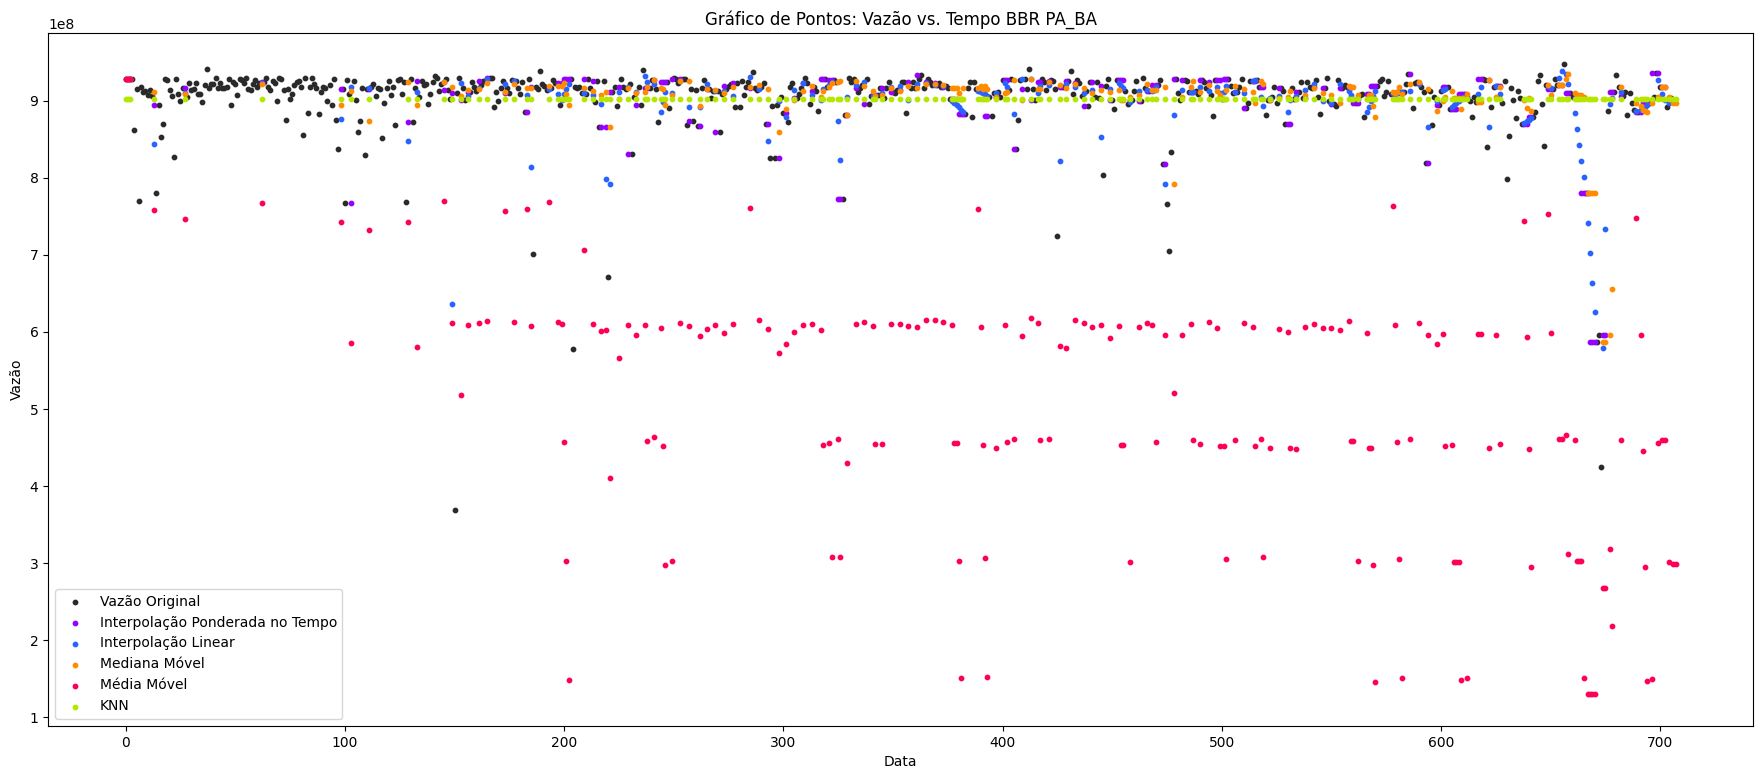

In [15]:
plot_grafico(df_pa_ba_bbr, " BBR PA_BA")

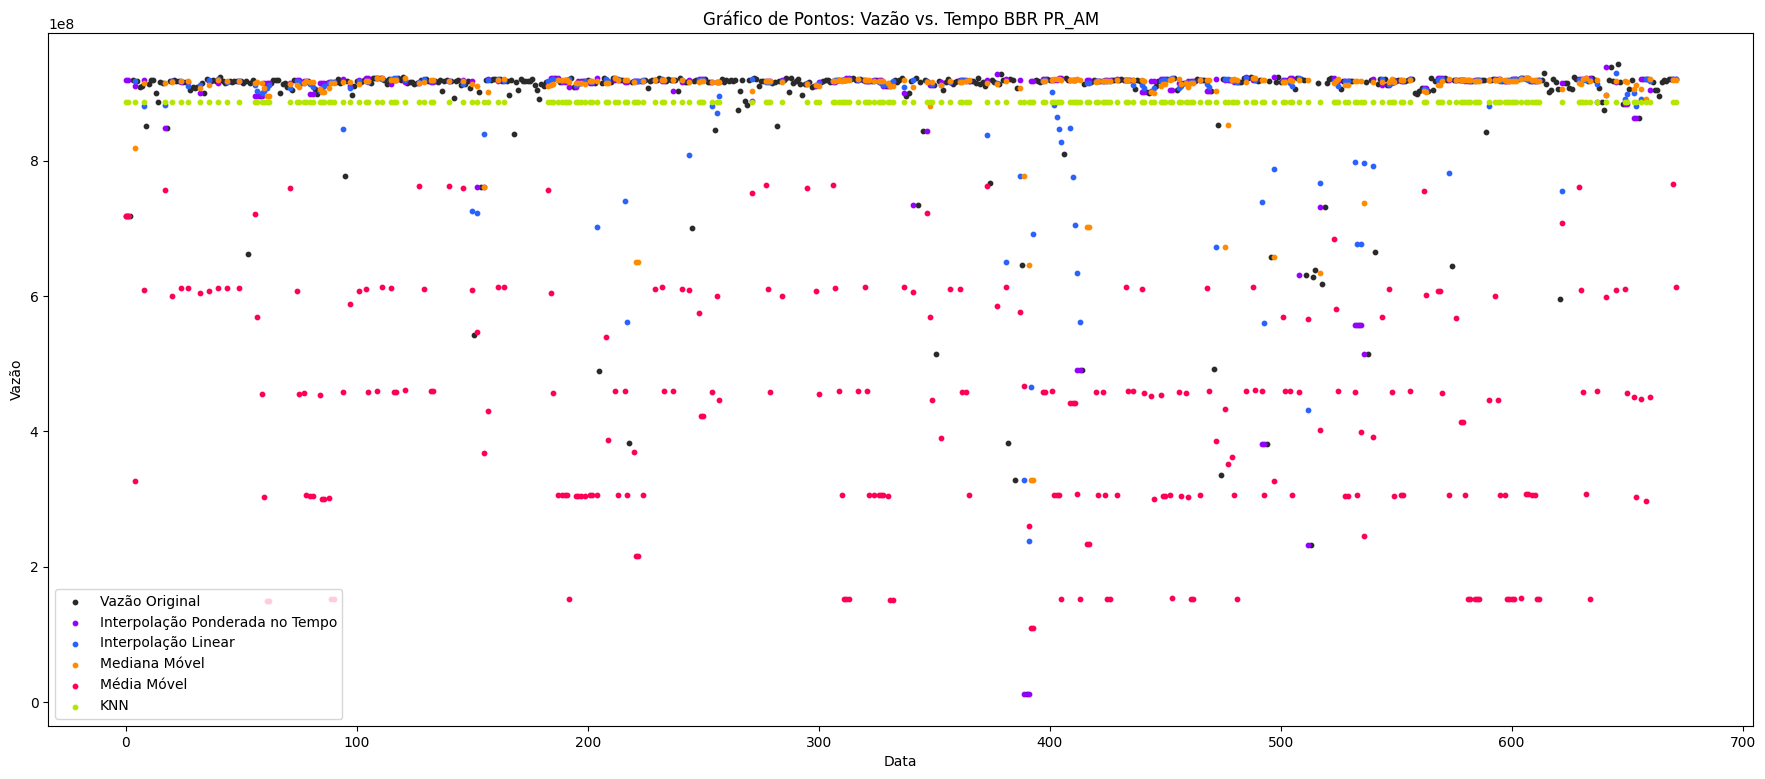

In [16]:
df_pr_am_bbr = pd.DataFrame()
for arquivo in os.listdir(caminho_bbr_pr_am):
    if "interpolacao-linear" in arquivo: metodo = "interpolacao-linear"
    if "interpolacao-ponderada" in arquivo: metodo = "interpolacao-ponderada"
    if "knn" in arquivo: metodo = "knn"
    if "media-movel" in arquivo: metodo = "media-movel"
    if "mediana-movel" in arquivo: metodo = "mediana-movel"
    if "multi-time" in arquivo: metodo = "multi-time"
    caminho_arquivo = os.path.join(caminho_bbr_pr_am, arquivo)
    df = pd.read_csv(caminho_arquivo)
    df_pr_am_bbr[metodo] = df['Vazao']

df_pr_am_bbr["original"] = vazao_pr_am["Vazao"]
df_pr_am_bbr["Sintético"] = np.where(vazao_pr_am["Vazao"] == -1, '1', '0')
df_pr_am_bbr

plot_grafico(df_pr_am_bbr, " BBR PR_AM")


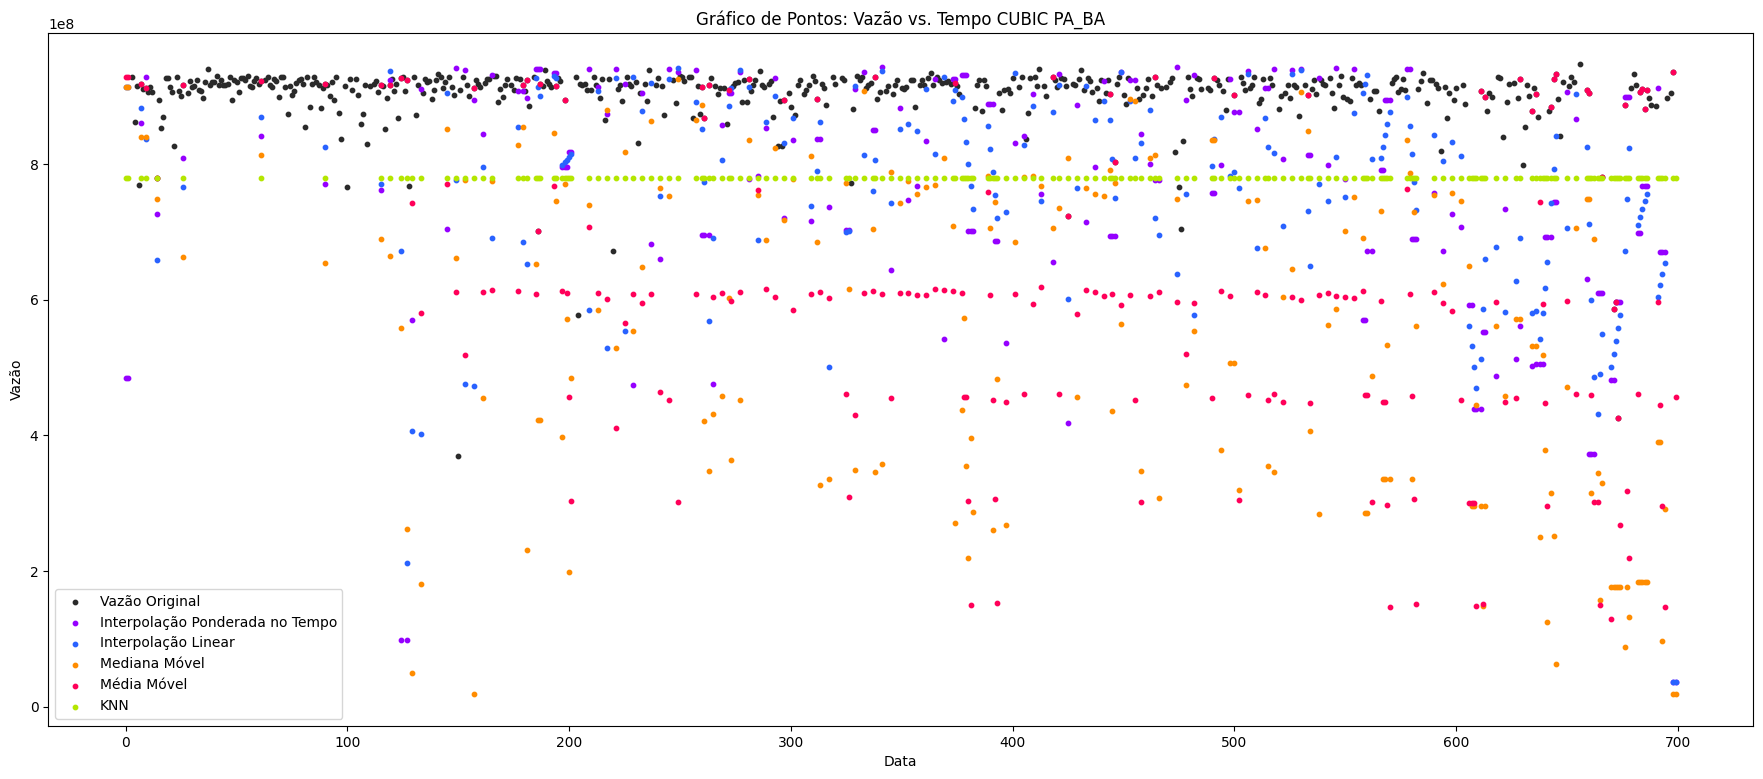

In [17]:
df_pa_ba_cubic = pd.DataFrame()
for arquivo in os.listdir(caminho_cubic_pa_ba):
    if "interpolacao-linear" in arquivo: metodo = "interpolacao-linear"
    if "interpolacao-ponderada" in arquivo: metodo = "interpolacao-ponderada"
    if "knn" in arquivo: metodo = "knn"
    if "media-movel" in arquivo: metodo = "media-movel"
    if "mediana-movel" in arquivo: metodo = "mediana-movel"
    if "multi-time" in arquivo: metodo = "multi-time"
    caminho_arquivo = os.path.join(caminho_cubic_pa_ba, arquivo)
    df = pd.read_csv(caminho_arquivo)
    df_pa_ba_cubic[metodo] = df['Vazao']

df_pa_ba_cubic["original"] = vazao_pa_ba["Vazao"]
df_pa_ba_cubic["Sintético"] = np.where(cubic_vazao_pa_ba["Vazao"] == -1, '1', '0')

plot_grafico(df_pa_ba_cubic, " CUBIC PA_BA")

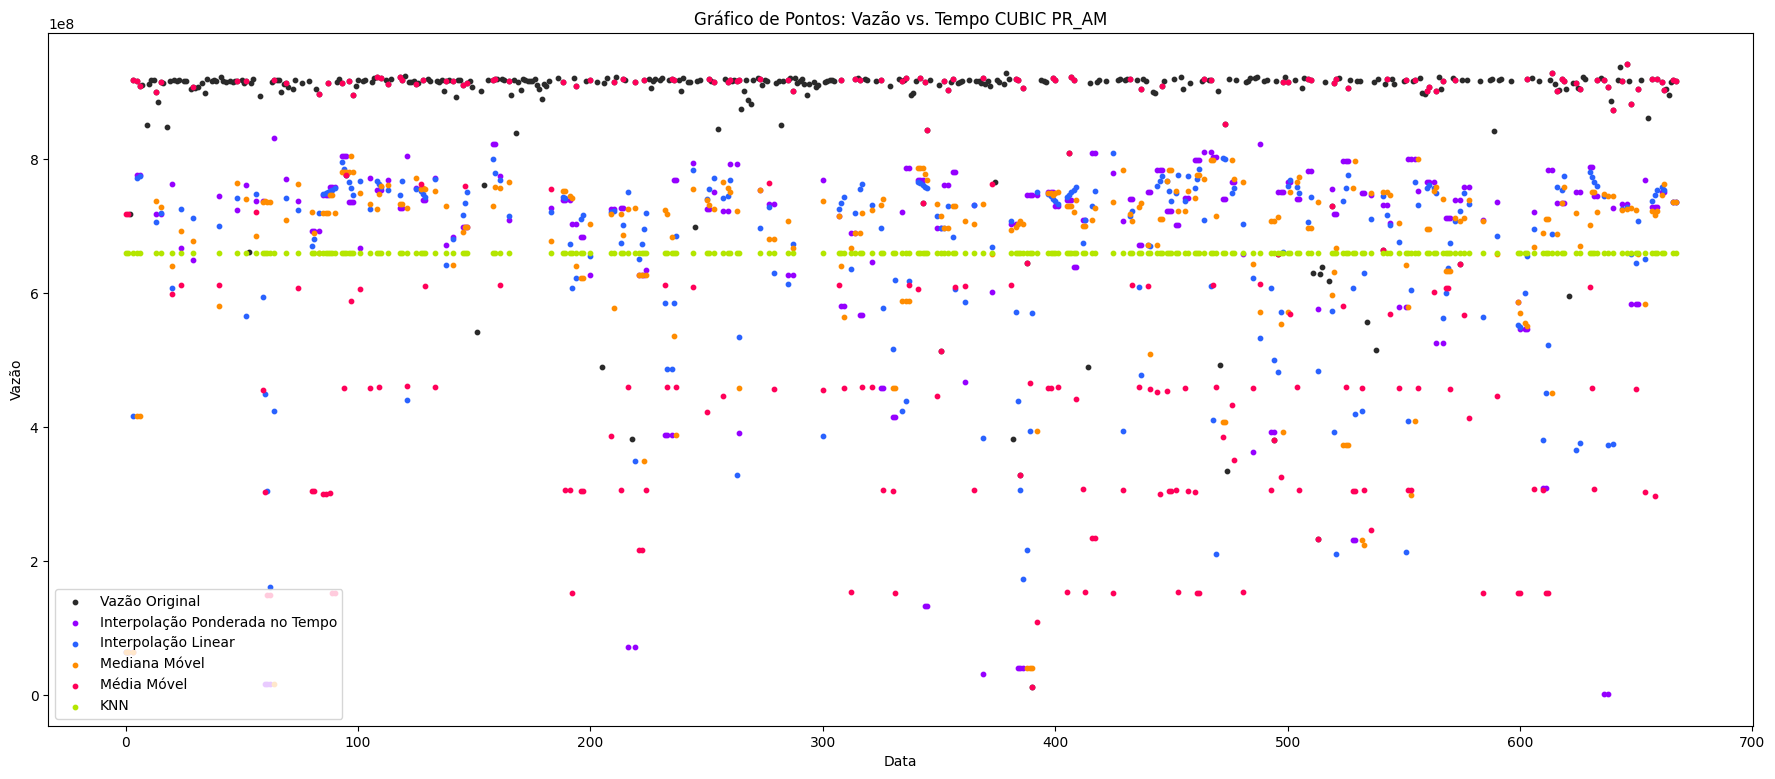

In [18]:
df_pr_am_cubic = pd.DataFrame()
for arquivo in os.listdir(caminho_cubic_pr_am):
    if "interpolacao-linear" in arquivo: metodo = "interpolacao-linear"
    if "interpolacao-ponderada" in arquivo: metodo = "interpolacao-ponderada"
    if "knn" in arquivo: metodo = "knn"
    if "media-movel" in arquivo: metodo = "media-movel"
    if "mediana-movel" in arquivo: metodo = "mediana-movel"
    if "multi-time" in arquivo: metodo = "multi-time"
    caminho_arquivo = os.path.join(caminho_cubic_pr_am, arquivo)
    df = pd.read_csv(caminho_arquivo)
    df_pr_am_cubic[metodo] = df['Vazao']

df_pr_am_cubic["original"] = vazao_pr_am["Vazao"]
df_pr_am_cubic["Sintético"] = np.where(cubic_vazao_pr_am["Vazao"] == -1, '1', '0')
df_pr_am_cubic

plot_grafico(df_pr_am_cubic, " CUBIC PR_AM")
